# Homework 6

Billy Nayden

In [37]:
import pandas as pd

## 1. Evaluate text similarity of Amazon book search results by doing the following:
> **a.	Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.**

I chose to do a book search on books related to *UFOs* and found the following 24 titles below.

In [43]:
df = ["UFOs: The Ultimate Abduction",
     "An Illustrated History of UFOs",
     "UFOs: Generals, Pilots, and Government Officials Go on the Record",
     "The Hynek UFO Report: The Authoritative Account of the Project Blue Book Cover-Up",
     "UFO: Steve Hanson vs The Flying Saucer (The Unexplained, Explained)",
     "Beyond UFOs: The Science of Consciousness & Contact with Non Human Intelligence (Volume 1)",
     "ALIENS, UFOS & THE OCCULT: USE YOUR ILLUSION I: UAP Disclosure, Spiritual Warfare and Manifesting Extraterrestrials through Entertainment",
     "The Alien Art - coloring book - 24 Fun and Unique Pages.: Enjoy U.FO.'s, Alien Abductions, Crop Circles, Cow Abductions or Picnic Days at Stone Henge and more",
     "UFO Cow Abduction: Beam Up Your Bovine (With Light and Sound!)",
     "UFOs and the National Security State: The Cover-Up Exposed, 1973-1991",
     "The Uninvited : An exposé of the alien abduction phenomenon",
     "Somewhere in the Skies: A Human Approach to the UFO Phenomenon",
     "UFOs & Nukes: Extraordinary Encounters at Nuclear Weapons Sites",
     "Triangular UFOs: An Estimate of the Situation",
     "THE PORTALS AND UFOs OF MOUNT SHASTA",
     "UFO Crash Retrievals: The Complete Investigation - Status Reports I-VII (1978-1994)",
     "Confession: Our Hidden Alien Encounters Revealed",
     "Schoolyard UFO Encounters: 100 True Accounts",
     "UFO Encounters: How High Strange Events Transform Human Perception",
     "The Messengers: Owls, Synchronicity and the UFO Abductee",
     "Inside The Black Vault: The Government's UFO Secrets Revealed",
     "UFO Secrets Inside Wright-Patterson: Eyewitness Accounts from the Real Area 51",
     "UFOs and the National Security State: Chronology of a Coverup, 1941-1973",
     "The CIA UFO Papers: 50 Years of Government Secrets and Cover-Ups"
]

print("Number of Books:",len(df))
print("Book Titles: ", df)

Number of Books: 24
Book Titles:  ['UFOs: The Ultimate Abduction', 'An Illustrated History of UFOs', 'UFOs: Generals, Pilots, and Government Officials Go on the Record', 'The Hynek UFO Report: The Authoritative Account of the Project Blue Book Cover-Up', 'UFO: Steve Hanson vs The Flying Saucer (The Unexplained, Explained)', 'Beyond UFOs: The Science of Consciousness & Contact with Non Human Intelligence (Volume 1)', 'ALIENS, UFOS & THE OCCULT: USE YOUR ILLUSION I: UAP Disclosure, Spiritual Warfare and Manifesting Extraterrestrials through Entertainment', "The Alien Art - coloring book - 24 Fun and Unique Pages.: Enjoy U.FO.'s, Alien Abductions, Crop Circles, Cow Abductions or Picnic Days at Stone Henge and more", 'UFO Cow Abduction: Beam Up Your Bovine (With Light and Sound!)', 'UFOs and the National Security State: The Cover-Up Exposed, 1973-1991', 'The Uninvited : An exposé of the alien abduction phenomenon', 'Somewhere in the Skies: A Human Approach to the UFO Phenomenon', 'UFOs & N

> **b.	In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.** 

In [44]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
from nltk.tokenize import word_tokenize
import string

In [45]:
#set stopwords as a variable
sw = stopwords.words('english')

In [46]:
#code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#function to clean the titles up
def clean_titles(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

In [49]:
title_list_clean = list(map(clean_titles,df))

#Double check that our list is cleaned (all lower and no punctuation)
title_list_clean

['ufos ultimate abduction',
 'illustrated history ufos',
 'ufos generals pilots government officials go record',
 'hynek ufo report authoritative account project blue book coverup',
 'ufo steve hanson vs flying saucer unexplained explained',
 'beyond ufos science consciousness contact non human intelligence volume 1',
 'aliens ufos occult use illusion uap disclosure spiritual warfare manifesting extraterrestrials entertainment',
 'alien art coloring book 24 fun unique pages enjoy ufos alien abductions crop circles cow abductions picnic days stone henge',
 'ufo cow abduction beam bovine light sound',
 'ufos national security state coverup exposed 19731991',
 'uninvited exposé alien abduction phenomenon',
 'somewhere skies human approach ufo phenomenon',
 'ufos nukes extraordinary encounters nuclear weapons sites',
 'triangular ufos estimate situation',
 'portals ufos mount shasta',
 'ufo crash retrievals complete investigation status reports ivii 19781994',
 'confession hidden alien enc

In [50]:
#import cosine simliarity
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
#Create our matrix of word appearances
vec = CountVectorizer().fit_transform(title_list_clean)
vecs = vec.toarray()

In [52]:
#Shape of our vector matrix
vecs.shape

(24, 130)

In [53]:
#Cosine similarity of the titles
cos_similarity = cosine_similarity(vecs)

#Examine the first two titles of the matrix
cos_similarity[:2,:]

array([[1.        , 0.33333333, 0.21821789, 0.        , 0.        ,
        0.19245009, 0.16666667, 0.11785113, 0.21821789, 0.21821789,
        0.25819889, 0.        , 0.21821789, 0.28867513, 0.28867513,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21821789, 0.        ],
       [0.33333333, 1.        , 0.21821789, 0.        , 0.        ,
        0.19245009, 0.16666667, 0.11785113, 0.        , 0.21821789,
        0.        , 0.        , 0.21821789, 0.28867513, 0.28867513,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21821789, 0.        ]])

In [54]:
#Create function to compare pairwise:
cos_similarity.shape

(24, 24)

> **c.	Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?**

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

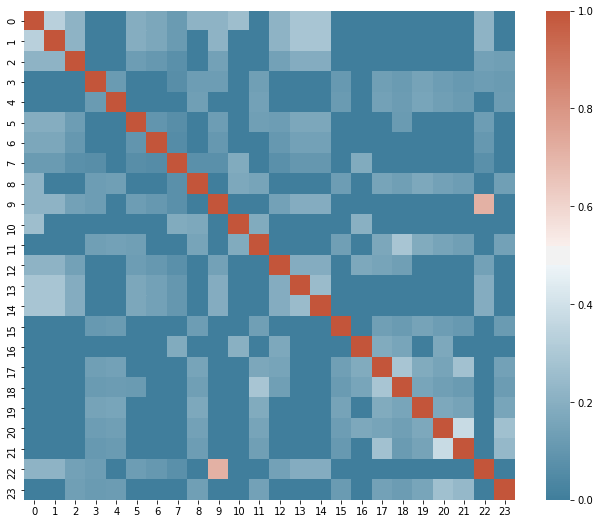

In [56]:
#code adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cos_similarity, cmap=cmap)

Judging by our heatmap, we can easily tell that (9, 22), or (22,9) since it's a symmetric matrix, have the similarity score.

In [58]:
print("Score: ", cos_similarity[9,22])
print("\nTitle 9:\n", df[9],"\n","Title 22: \n",df[22])

Score:  0.7142857142857142

Title 9:
 UFOs and the National Security State: The Cover-Up Exposed, 1973-1991 
 Title 22: 
 UFOs and the National Security State: Chronology of a Coverup, 1941-1973


This makes sense, because these books appear to be in the same series about UFOs and national security. However, they are ranked 13 books apart which seems far apart for such similar books.

In [59]:
#https://stackoverflow.com/questions/30180241/numpy-get-the-column-and-row-index-of-the-minimum-value-of-a-2d-array

#Find the minimum value
print(np.unravel_index(cos_similarity.argmin(), cos_similarity.shape))

(0, 3)


This appears to be the initial zero value between the first book and the 4th book.

In [60]:
print("Title 0:\n", df[0],"\n","Title 3: \n",df[3])

Title 0:
 UFOs: The Ultimate Abduction 
 Title 3: 
 The Hynek UFO Report: The Authoritative Account of the Project Blue Book Cover-Up


These books actually have zero overlap because one uses the word *UFO* while the other uses the term *UFOs*.

## 2.	Now evaluate using a major search engine.
> **a.	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results.**

In [62]:
#Title used for Google search
Title = "ufos ultimate abduction"

#1st organic reslt
first = """New book "UFOS: The Ultimate Abduction" by Raymond E"""
#20th organic result
twentieth = """Greg Sandow -- A Review of David Jacobs's Book "The Threat"""

> **b.	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title).**

In [63]:
capsules = [Title, first, twentieth]

#code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#function to clean the capsules up
def clean_string(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

capsules_clean = list(map(clean_string,capsules))

In [65]:
capsules_clean

['ufos ultimate abduction',
 'new book ufos ultimate abduction raymond e',
 'greg sandow review david jacobss book threat']

In [66]:
#Create our matrix of word appearances
c_vec = CountVectorizer().fit_transform(capsules_clean)
cap_vecs = c_vec.toarray()

In [67]:
#Code adapted from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a

#Funciton to compare the two results to the title
def capsule_cossim_vecs(x, y):
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    return cosine_similarity(x,y)[0][0]

> **c.	Which one has the highest similarity measure?** 

In [68]:
#Title versus 1st capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[1])

0.7071067811865477

In [69]:
#Title versus 20th capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[2])

0.0

The 1st capsule was much more similar than the 20th capsule, which was not particularly surprising.

Overall, I was not shocked with my findings, though it was a good conceptual exercise. Many of the books about *UFOs* on Amazon discuss similar topics and use similar keywords in their titles, so it makes sense that they would be similar.

Additionally, in my Google results, it makes sense that the 1st result would be a relatively high similarity score, while the 20th would be virtually zero. Obviously, Google wants to present the most relevant results first, and UFO books are not widely covered on the internet.